# Assignment:
Derive 10 Hypothesis from HR Attriation Data

In [1]:
#import library
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Read Data from csv File**

In [2]:
Dataset=pd.read_csv("general_data.csv")
Dataset.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4


**Extract Feature Set**

In [3]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [4]:
Dataset.shape

(4410, 24)

In [5]:
Dataset.describe()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4391.000000,4410.000000,4410.0,4410.000000,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,9.192517,2.912925,1.0,2205.500000,2.063946,65029.312925,2.694830,15.209524,8.0,0.793878,11.279936,2.799320,7.008163,2.187755,4.123129
std,9.133301,8.105026,1.023933,0.0,1273.201673,1.106689,47068.888559,2.498887,3.659108,0.0,0.851883,7.782222,1.288978,6.125135,3.221699,3.567327
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,1.0,1103.250000,1.000000,29110.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,1.0,2205.500000,2.000000,49190.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,1.0,3307.750000,3.000000,83800.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,1.0,4410.000000,5.000000,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


In [6]:
Dataset.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

### **Clean Data**

In [7]:
Dataset.isnull()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4406,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4407,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4408,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
Dataset.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4405    False
4406    False
4407    False
4408    False
4409    False
Length: 4410, dtype: bool

In [9]:
Dataset.drop_duplicates()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,1,Research Scientist,Single,60290,3.0,Y,17,8,1,10.0,5,3,0,2
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,1,Laboratory Technician,Divorced,26790,2.0,Y,15,8,0,10.0,2,3,0,2
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,2,Sales Executive,Married,37020,0.0,Y,20,8,0,5.0,4,4,1,2
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,1,Laboratory Technician,Divorced,23980,0.0,Y,14,8,1,10.0,2,9,7,8


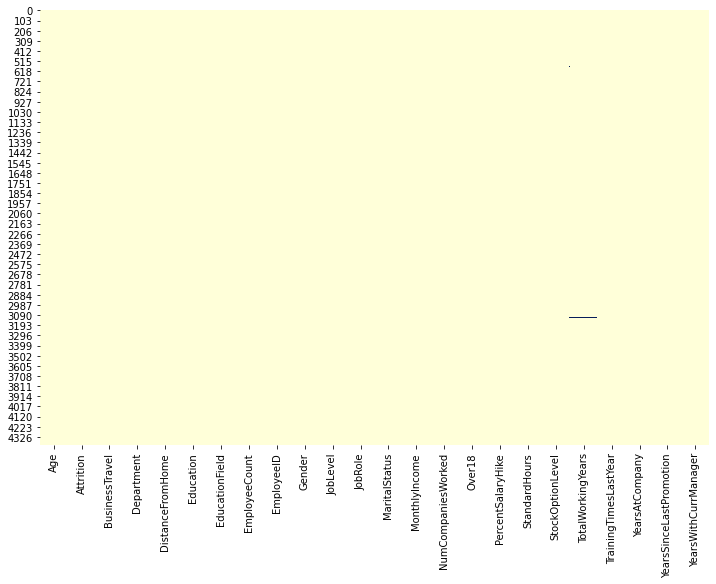

In [10]:
plt.figure(figsize=(12,8))
sns.heatmap(Dataset.isnull(),cbar=False,cmap="YlGnBu");

In [11]:
Dataset.isnull().sum().sort_values(ascending=False)

NumCompaniesWorked         19
TotalWorkingYears           9
YearsWithCurrManager        0
JobLevel                    0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobRole                     0
YearsSinceLastPromotion     0
MaritalStatus               0
MonthlyIncome               0
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TrainingTimesLastYear       0
YearsAtCompany              0
Age                         0
dtype: int64

**We see that NumCompaniesWorked and TotalWorkingYears have missing values.**

We would handle the missing values by replacing them with the last valid observation value of each column before the missing item

In [12]:
cols_Dataset = ["NumCompaniesWorked","TotalWorkingYears"]

In [13]:
#columns with missing values
Dataset_missing= Dataset[Dataset.isnull().any(axis=1)][cols_Dataset]
Dataset_missing.index

Int64Index([  23,  115,  137,  210,  308,  343,  476,  574,  647,  799,  932,
            1103, 1312, 1517, 1521, 1711, 1996, 2365, 2367, 2696, 3063, 3120,
            3533, 3818, 3910, 4226, 4395, 4409],
           dtype='int64')

In [14]:
Dataset.fillna(method='ffill',inplace=True)

In [15]:
Dataset[cols_Dataset].iloc[Dataset_missing.index]

,NumCompaniesWorked,TotalWorkingYears
23,1.0,21.0
115,9.0,5.0
137,7.0,13.0
210,1.0,18.0
308,4.0,2.0
343,1.0,10.0
476,1.0,4.0
574,7.0,2.0
647,6.0,9.0
799,3.0,7.0


In [16]:
#check if data fill occured correctly
Dataset.describe().transpose()['count'].sort_values()

Age                        4410.0
DistanceFromHome           4410.0
Education                  4410.0
EmployeeCount              4410.0
EmployeeID                 4410.0
JobLevel                   4410.0
MonthlyIncome              4410.0
NumCompaniesWorked         4410.0
PercentSalaryHike          4410.0
StandardHours              4410.0
StockOptionLevel           4410.0
TotalWorkingYears          4410.0
TrainingTimesLastYear      4410.0
YearsAtCompany             4410.0
YearsSinceLastPromotion    4410.0
YearsWithCurrManager       4410.0
Name: count, dtype: float64

In [17]:
#check if duplicate exist
Dataset.duplicated().any()

False

# **Univariate Analysis**

**Attrition Distribution**

In [18]:
Dataset['Attrition'].value_counts()

No     3699
Yes     711
Name: Attrition, dtype: int64

In [19]:
AttriationPercentage=Dataset['Attrition'].value_counts()/Dataset['Attrition'].count()
print(AttriationPercentage)

No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64


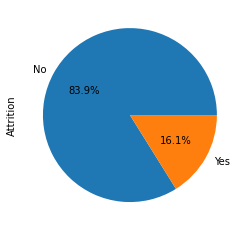

In [20]:
#plot pi graph for attriation
Dataset['Attrition'].value_counts().plot(kind='pie',autopct="%1.1f%%")

**We can see that in dataset 16.1% employees attrited and rest did not**

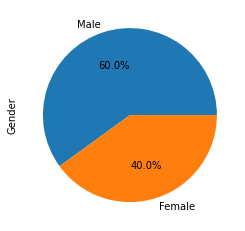

In [21]:
Dataset['Gender'].value_counts().plot(kind='pie',autopct="%1.1f%%")

**In the Dataset: There are total 60% male employees and 40% female employees**

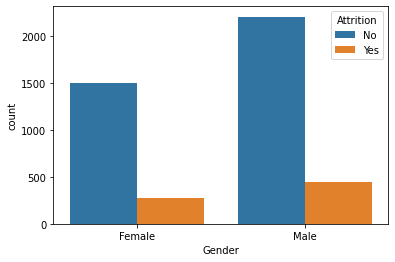

In [22]:
sns.countplot(x='Gender',hue='Attrition',data=Dataset)

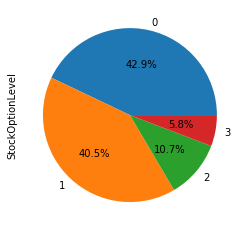

In [23]:
Dataset['StockOptionLevel'].value_counts().plot(kind='pie',autopct="%1.1f%%")

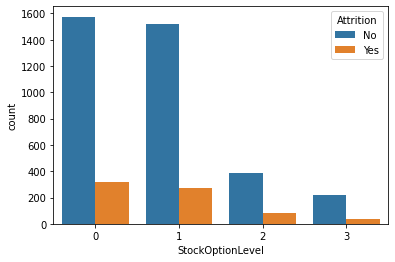

In [24]:
sns.countplot(x='StockOptionLevel',hue='Attrition',data=Dataset)

It can be seen that attrition is high in case of StockOptionLevel is less than 2

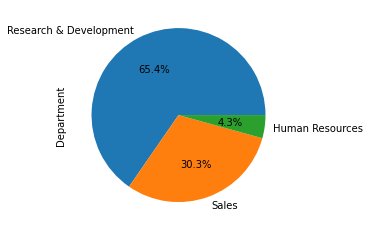

In [25]:
Dataset['Department'].value_counts().plot(kind='pie',autopct="%1.1f%%")

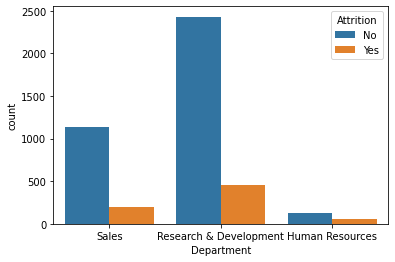

In [26]:
sns.countplot(x='Department',hue='Attrition',data=Dataset)

**The employee from Research & Development Department have higher attrition rate compared to other departments.**

In [27]:
uni_cols = ['Age','DistanceFromHome','MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike','TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany','YearsSinceLastPromotion', 'YearsWithCurrManager']

In [28]:
Dataset_desc=Dataset[uni_cols].describe()
Dataset_desc=Dataset_desc.transpose()
Dataset_desc['IQR']=Dataset_desc['75%']-Dataset_desc['25%']
Dataset_desc

,count,mean,std,min,25%,50%,75%,max,IQR
Age,4410.0,36.923810,9.133301,18.0,30.0,36.0,43.0,60.0,13.0
DistanceFromHome,4410.0,9.192517,8.105026,1.0,2.0,7.0,14.0,29.0,12.0
MonthlyIncome,4410.0,65029.312925,47068.888559,10090.0,29110.0,49190.0,83800.0,199990.0,54690.0
NumCompaniesWorked,4410.0,2.693197,2.499167,0.0,1.0,2.0,4.0,9.0,3.0
PercentSalaryHike,4410.0,15.209524,3.659108,11.0,12.0,14.0,18.0,25.0,6.0
TotalWorkingYears,4410.0,11.285261,7.787073,0.0,6.0,10.0,15.0,40.0,9.0
TrainingTimesLastYear,4410.0,2.799320,1.288978,0.0,2.0,3.0,3.0,6.0,1.0
YearsAtCompany,4410.0,7.008163,6.125135,0.0,3.0,5.0,9.0,40.0,6.0
YearsSinceLastPromotion,4410.0,2.187755,3.221699,0.0,0.0,1.0,3.0,15.0,3.0
YearsWithCurrManager,4410.0,4.123129,3.567327,0.0,2.0,3.0,7.0,17.0,5.0


In [29]:
#Now choose only those where Attrition=Yes
Dataset_desc_yes=Dataset[Dataset['Attrition'] == 'Yes'][uni_cols].describe()
Dataset_desc_yes=Dataset_desc_yes.transpose()
Dataset_desc_yes['IQR'] = Dataset_desc_yes['75%'] - Dataset_desc_yes['25%']
Dataset_desc_yes

,count,mean,std,min,25%,50%,75%,max,IQR
Age,711.0,33.607595,9.675693,18.0,28.0,32.0,39.0,58.0,11.0
DistanceFromHome,711.0,9.012658,7.772368,1.0,2.0,7.0,15.0,29.0,13.0
MonthlyIncome,711.0,61682.616034,44792.067695,10090.0,28440.0,49080.0,71040.0,198590.0,42600.0
NumCompaniesWorked,711.0,2.931083,2.674771,0.0,1.0,1.0,5.0,9.0,4.0
PercentSalaryHike,711.0,15.481013,3.775289,11.0,12.0,14.0,18.0,25.0,6.0
TotalWorkingYears,711.0,8.272855,7.192236,0.0,3.0,7.0,10.0,40.0,7.0
TrainingTimesLastYear,711.0,2.654008,1.154834,0.0,2.0,3.0,3.0,6.0,1.0
YearsAtCompany,711.0,5.130802,5.941598,0.0,1.0,3.0,7.0,40.0,6.0
YearsSinceLastPromotion,711.0,1.945148,3.148633,0.0,0.0,1.0,2.0,15.0,2.0
YearsWithCurrManager,711.0,2.852321,3.138918,0.0,0.0,2.0,5.0,14.0,5.0


**It can be noted above that we calculate the Inter Quartile Range and see that attrition is among a wide range of salary ~42K**

**Also mean salary in attriated employee is ~61K**

# **Median**

In [30]:
Dataset_median=Dataset[uni_cols].median()
Dataset_median

Age                           36.0
DistanceFromHome               7.0
MonthlyIncome              49190.0
NumCompaniesWorked             2.0
PercentSalaryHike             14.0
TotalWorkingYears             10.0
TrainingTimesLastYear          3.0
YearsAtCompany                 5.0
YearsSinceLastPromotion        1.0
YearsWithCurrManager           3.0
dtype: float64

In [31]:
#we check median values for Attrition = Yes
Dataset_median_yes = Dataset[Dataset['Attrition'] == 'Yes'][uni_cols].median()
Dataset_median_yes

Age                           32.0
DistanceFromHome               7.0
MonthlyIncome              49080.0
NumCompaniesWorked             1.0
PercentSalaryHike             14.0
TotalWorkingYears              7.0
TrainingTimesLastYear          3.0
YearsAtCompany                 3.0
YearsSinceLastPromotion        1.0
YearsWithCurrManager           2.0
dtype: float64

In [32]:
#We check median values for Attrition = Yes
Dataset_median_no=Dataset[Dataset['Attrition'] == 'No'][uni_cols].median()
Dataset_median_no

Age                           36.0
DistanceFromHome               7.0
MonthlyIncome              49300.0
NumCompaniesWorked             2.0
PercentSalaryHike             14.0
TotalWorkingYears             10.0
TrainingTimesLastYear          3.0
YearsAtCompany                 6.0
YearsSinceLastPromotion        1.0
YearsWithCurrManager           3.0
dtype: float64

# **Mode**

In [33]:
Dataset_mode=Dataset[uni_cols].mode()
Dataset_mode.transpose()

,0
Age,35.0
DistanceFromHome,2.0
MonthlyIncome,23420.0
NumCompaniesWorked,1.0
PercentSalaryHike,11.0
TotalWorkingYears,10.0
TrainingTimesLastYear,2.0
YearsAtCompany,5.0
YearsSinceLastPromotion,0.0
YearsWithCurrManager,2.0


In [34]:
#calculate mode when Attrition = yes
Dataset_mode_yes=Dataset[Dataset['Attrition'] == 'Yes'][uni_cols].mode()
Dataset_mode_yes.transpose().iloc[:,0]

Age                           29.0
DistanceFromHome               2.0
MonthlyIncome              25590.0
NumCompaniesWorked             1.0
PercentSalaryHike             13.0
TotalWorkingYears              1.0
TrainingTimesLastYear          2.0
YearsAtCompany                 1.0
YearsSinceLastPromotion        0.0
YearsWithCurrManager           0.0
Name: 0, dtype: float64

In [35]:
#calculate mode when Attrition = No
Dataset_mode_no=Dataset[Dataset['Attrition'] == 'No'][uni_cols].mode()
Dataset_mode_no.transpose().iloc[:,0]

Age                           34.0
DistanceFromHome               1.0
MonthlyIncome              23420.0
NumCompaniesWorked             1.0
PercentSalaryHike             11.0
TotalWorkingYears             10.0
TrainingTimesLastYear          2.0
YearsAtCompany                 5.0
YearsSinceLastPromotion        0.0
YearsWithCurrManager           2.0
Name: 0, dtype: float64

# Variance

In [36]:
Dataset_variance=Dataset[uni_cols].var().sort_values()
Dataset_variance

TrainingTimesLastYear      1.661465e+00
NumCompaniesWorked         6.245837e+00
YearsSinceLastPromotion    1.037935e+01
YearsWithCurrManager       1.272582e+01
PercentSalaryHike          1.338907e+01
YearsAtCompany             3.751728e+01
TotalWorkingYears          6.063850e+01
DistanceFromHome           6.569144e+01
Age                        8.341719e+01
MonthlyIncome              2.215480e+09
dtype: float64

# **Skewness**

In [37]:
Dataset_skew=Dataset[uni_cols].skew().sort_values()
Dataset_skew

Age                        0.413005
TrainingTimesLastYear      0.552748
PercentSalaryHike          0.820569
YearsWithCurrManager       0.832884
DistanceFromHome           0.957466
NumCompaniesWorked         1.029043
TotalWorkingYears          1.113861
MonthlyIncome              1.368884
YearsAtCompany             1.763328
YearsSinceLastPromotion    1.982939
dtype: float64

# **Kurtosis**

In [38]:
Dataset_kurt=Dataset[uni_cols].kurt().sort_values()
Dataset_kurt

Age                       -0.405951
PercentSalaryHike         -0.302638
DistanceFromHome          -0.227045
NumCompaniesWorked         0.011277
YearsWithCurrManager       0.167949
TrainingTimesLastYear      0.491149
TotalWorkingYears          0.901566
MonthlyIncome              1.000232
YearsSinceLastPromotion    3.601761
YearsAtCompany             3.923864
dtype: float64

**The following Inference could be made now:**

**1.   From Inter Quartile Range data we see that attirition is among a wide range of employee having salary ~42K**

**2.   We can see that most employees are leaving at age of 29 and who have percentsalaryHike(13) lower that median(14)**

**3.   Mean age is 13 years for all sample but 11 years for those attrited.**



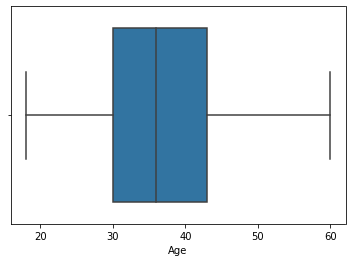

In [39]:
box_plot=Dataset.Age
sns.boxplot(box_plot)

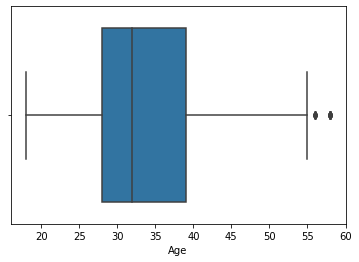

In [40]:
box_plot_attrited=Dataset[Dataset['Attrition'] == 'Yes'].Age
sns.boxplot(box_plot_attrited)

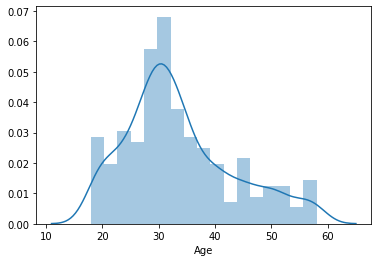

In [41]:
sns.distplot(Dataset[Dataset['Attrition'] == 'Yes'].Age)

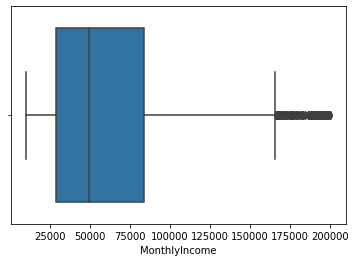

In [42]:
box_plot=Dataset.MonthlyIncome
sns.boxplot(box_plot)

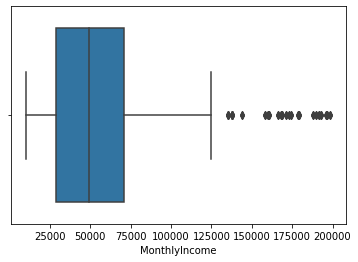

In [43]:
box_plot_attrited = Dataset[Dataset['Attrition'] == 'Yes'].MonthlyIncome
sns.boxplot(box_plot_attrited);

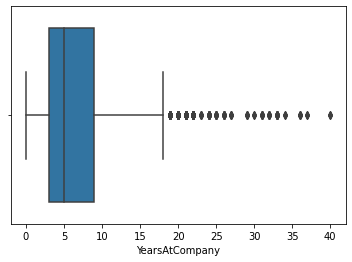

In [44]:
box_plot=Dataset.YearsAtCompany 
sns.boxplot(box_plot);

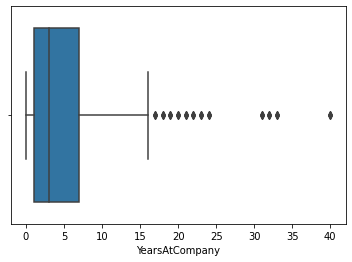

In [45]:
box_plot_attrited = Dataset[Dataset['Attrition'] == 'Yes'].YearsAtCompany
sns.boxplot(box_plot_attrited);

# **Hypothesis**

**Hypothesis 1:**

The mean age of the employees who left the company is less than or equal to 32

H0: μ<=32

H1: μ>32

**Hypothesis 2:**

The mean of employees who spent with their current manager is less than 3 years

H0: μ<=3
H1: μ>3

**Hypothesis 3:**

The mean of total working years of employees who stayed in company is more than 10 years

H0: μ>=10
H1: μ<10

**Hypothesis 4:**

The male employee have high attrition rate than female employees

Ho : μa > μb (Null Hypothesis where a denotes male employee and b denotes female employee)

H1 : μa < μb (Alternative Hypothesis)

**Hypothesis 5:**

The mean of of employees with years since last promotion who has left the company is less than 2years.

H0: μ<=2

H1: μ>2

**Hypothesis 6:**

The mean monthly income of employees who has left the company is 61,000.

H0: μ=61,000
H1: μ!=61,000

**Hypothesis 7:**

The mean number of companies worked of employees who stayed in company is less than 2

H0: μ<= 2

H1: μ > 2

**Hypothesis 8:**

The employee who works in Research & Development Department have high attrition rate than who works in Sales Department

Ho : μa >= μb (Null Hypothesis where a is Employee in Research & Development Department , b is Employee works in Sales Department )

H1 : μa < μb (Alternative Hypothesis)

**Hypothesis 9:**
The mean education of employess who stayed in the company XYZ are having bachelor's degree(Level=3)

H0: μ=3

H1: μ!=3

**Hypothesis 10:**

The mean training time of employees who left the company XYZ is less than 2 years

H0: μ<=2

H1: μ>2